# Analysis of consumer preferences and store specific attributes to predict customer loyalty and store profitability. 


# A case study of Foodmart

## Introduction:

As digital marketing and data science continue to thrive symbiotically, a lot of businesses concentrate on cross selling and upselling. In this scenario, the key challenge is to understand the association between different item sets purchased together and the combination of goods bought most frequently. One such machine learning technique which helps the retailers understand the relationships between products is called “Market Basket Analysis”. In other words, this technique helps the retailers to recognize patterns and intricacies between different products that the individuals purchase. As massive amounts of purchase data and consumer transaction data are stored digitally, it is important for organizations to convert this digital data into business insights to help strategic decision making and marketing. For example, if a retailer has prior knowledge that a consumer who purchases beer is likely to purchase diapers, they might place these products in close proximity to each other, cross sell such products or upsell.

In addition to that, it is also important to identify the most loyal customers and churning customers, so that appropriate marketing strategies would enhance consumer spending of loyal customers and aid in the conversion of churning customers into loyal customers.


## Objectives of this study:

The following are the objectives of this project:

1.	To understand and present an overview of the Supermarket business at Foodmart.
2.	To identify the most frequently bought item sets.
3.	To identify the high value loyal customers for the store.
4.	To identify groups of customers with similar attributes.
5.	To devise efficient market strategies for conversion of churning out customers into Platinum and Gold customers.
6.	To design marketing strategies to improve profit margins for the superstore.


## Data:

Food Mart data has been used for the purpose of this project, which is available open source. This dataset consists of above 200,000 transactions and 75 features (before data cleaning). This provides a perfect base to apply different machine learning techniques to get a comprehensive idea of consumer buying behavior in supermarkets.

### The dataset used for this study consists of the following information over the 1996 to 1998.
1.	Product specific features: Product name, packaging, brand names, category, subcategory, department, gross weight, net weight, etc.
2.	Store specific attributes: Store sales, store cost, unit sales, store province, store city, store district, store area, meat area, frozen area, coffee bar, salad bar, prepared food, store type, video store, etc.
3.	Customer specific attributes: Income, Gender, education, occupation, homeowner, number of cars, number of children, city, province, etc.


### We will look into these variables in detail in our subsequent discussion.

## Organisation:

The analysis presented in this study is divided into **six** sections:


#### Section 1:

**Exploratory Data Analysis** 

How does the business look like? What are the key insights?

#### Section 2:

**Market Based Analysis** 

Applying Apriori and FPGrowth algorithms to group frequently bought item sets.


#### Section 3:

**RFM Analysis** 

Identifying the high value and churning customers based on Recency of Purchase, Frequency of purchase and dollar value of purchase.




#### Section 4:


**K-Means Clustering** 

Identifying clusters of customers with similar attributes.


#### Section 5:

**RFM Modeling** 

Predicting the RFM Loyalty level of customers using Machine Learning Techniques.


#### Section 6:

**Modeling profit margin levels** 

Predicting Profit margin levels of Food Mart using Machine Learning Techniques.

### Each section as indicated above will be discussed in the order detailed above.

### Preliminaries:

Before we start analysing the data, we need to first import the dataset into Python. My data is stored in Google Cloud Storage. I used Google AI Notebook for modeling purpose. Hence we need to connect the Google AI Notebook to Google Cloud Storage and fetch data from there in the form of a Pandas dataframe.

#### In order to achieve this, we need to follow the following procedure:

1. For this, I first created an AI Notebook instance and chose Python Jupyter Notebook in this instance.

2. Import google cloud storage into python on your AI Notebook. 

### The datafile used for analysis has been shared along with this notebook as part of the deliverable.

The snapshot below indicate the notebook instance that I have created on Google Cloud platform.


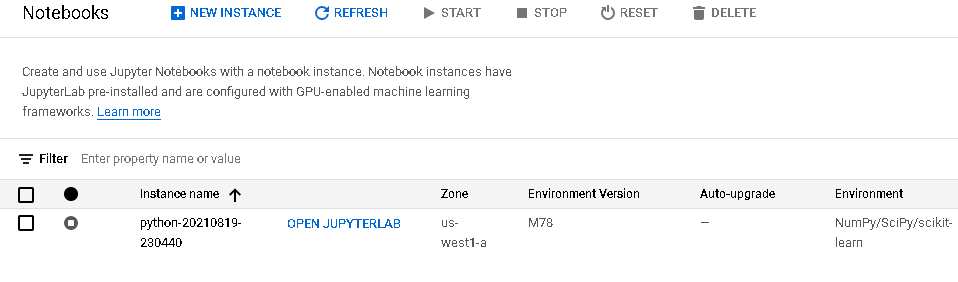






### Getting data from Google Cloud storage to Google AI Notebook.

**We first install google cloud storage on our Python Notebook. We then access the bucket from google cloud storage where the data is stored by specifying the name of the bucket. In our case, the name of the bucket is `foodmart_dataset`.**

In [147]:
!pip install google-cloud-storage

In [148]:
# Importing storage libraries from google cloud.

from google.cloud import storage
client = storage.Client()

In [149]:
# Specify the name of the bucket.

bucket = client.get_bucket("foodmart_dataset")

#### Once you  specify the name of the bucket, copy the commands below to get the dataset from your bucket in the form of a pandas dataframe.

In [150]:
blob = bucket.get_blob(f"Foodmart_dataset.csv")

In [151]:
bt = blob.download_as_string()

In [152]:
# Transform bytes to string
from io import StringIO
s = str(bt,"utf-8")
s = StringIO(s)


In [153]:
import pandas as pd

In [154]:
# Reading data in the form of a pandas dataframe.
df = pd.read_csv(s)


### We have another dataset called `promotion` in our bucket. We use the same set of code shown above to get the promotion data into our python notebook in the form of a pandas dataframe. This is shown below:

In [155]:
blob1 = bucket.get_blob(f"promotion.csv")
bt1 = blob1.download_as_string()
# Transform bytes to string
from io import StringIO
s1 = str(bt1,"utf-8")
s1 = StringIO(s1)
promotion = pd.read_csv(s1)

#### We now have the following two datasets in our notebook available for analysis:

1. Food Mart dataset (CSV)

2. Promotion dataset (CSV)





#### We are now ready to start Section 1 of our analysis:

# Section 1: Exploratory Data Analysis

We first look into the columns/variable names of our dataset.

In [156]:
promotion.head(1)

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date
0,1,110,High Roller Savings,Product Attachment,14435,1996-01-03,1996-01-06


In [157]:
df.head(1)

,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,...,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,0,337,371,6280,2,1.5,0.51,2,Anacortes,WA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


Next, we import all the required libraries into our Python Notebook.

In [158]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [159]:
from mlxtend.preprocessing import TransactionEncoder

In [160]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import networkx as nx
import warnings
import matplotlib as mpl

%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [161]:

from sklearn.preprocessing import LabelEncoder

Look into the shape of our foodmart dataset. We will primarily use this dataset for the purpose of analysis.

In [162]:
df.shape

(269720, 75)

In [163]:
# Checking for duplicates in my dataset.

df.drop_duplicates()

,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,...,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269715,269715,1529,786,433,20,9.81,3.3354,3,Oak Bay,BC,...,Victoria,Canada West,Canada,129,1998-02-24,Tuesday,1998,2,24,34388
269716,269716,1094,786,6094,20,7.54,3.4684,2,Sooke,BC,...,Victoria,Canada West,Canada,129,1998-02-24,Tuesday,1998,2,24,34388
269717,269717,467,786,5352,20,15.24,5.1816,4,Shawnee,BC,...,Victoria,Canada West,Canada,129,1998-02-24,Tuesday,1998,2,24,34388
269718,269718,656,786,3332,20,11.55,4.6200,3,Sooke,BC,...,Victoria,Canada West,Canada,129,1998-02-24,Tuesday,1998,2,24,34388


The dataset does not have any duplicates.

### Checking datatypes, Missing values and unique values

In [164]:
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()
temp

,data_type,null_count,unique_count
Unnamed: 0,int64,0,269720
product_id,int64,0,1559
time_id,int64,0,673
customer_id,int64,0,8842
store_id,int64,0,24
...,...,...,...
the_day,object,0,7
the_year,int64,0,2
the_month,int64,0,12
day_of_month,int64,0,30


In [165]:
#Reconfirm the number of null values in the dataset.

df.isnull().sum()

Unnamed: 0         0
product_id         0
time_id            0
customer_id        0
store_id           0
                  ..
the_day            0
the_year           0
the_month          0
day_of_month       0
day_since_epoch    0
Length: 75, dtype: int64

In [166]:
# Checking the datatypes of all our variables.
df.dtypes

Unnamed: 0          int64
product_id          int64
time_id             int64
customer_id         int64
store_id            int64
                    ...  
the_day            object
the_year            int64
the_month           int64
day_of_month        int64
day_since_epoch     int64
Length: 75, dtype: object

### In the dataset we donot have a transaction ID which can be used to create a basket of products bought simultaneously by each customer per transaction. Hence we need to think of a way to create transaction ID.

The most common way of doing this is to create an ID which would combine the customer ID and the time of shopping by each customer. We can do this by combining the `customer_ID` and `time_ID` columns using `str` function.

In [167]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

Now we have successfully created a `transaction_id` for each customer.

Next, let us filter out the columns that we need for market basket analysis.

We need to extract the following columns from our dataset:

1. transaction_id
2. customer_id
3. product_id
4. product_name (This would give additional details about the product).
5. unit_sales
6. time_id



In [168]:
product_name = df[['transaction_id','customer_id','product_id','product_name','unit_sales','time_id']]
product_name.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
0,6280371,6280,337,Better Turkey Noodle Soup,2,371
1,4018371,4018,963,Just Right Chicken Noodle Soup,1,371
2,6280371,6280,1512,Jardon Spaghetti,3,371
3,4018371,4018,181,High Top Lettuce,3,371
4,4382371,4382,483,Tell Tale Corn on the Cob,2,371


## The remaining part of the Exploratory Data Analysis along with insights have been presented in the Tableau Dashboard on the tab named `Exploratory Data Analysis`.

**We now proceed to Section 2 of our analysis.**

# Section 2: Market Basket Analysis

Let us count the number of transactions a product appears in the dataset using the groupby function as shown below.

In [169]:
productCountDf = product_name.groupby("product_id",as_index = False)['transaction_id'].count()

We now arrange the above dataset in descending order, and sort them on the basis of frequency of product purchase.

In [170]:
# Arranging the above dataset in descending order, sorted on the basis of product frequency.
productCountDf = productCountDf.sort_values("transaction_id",ascending = False)
productCountDf

,product_id,transaction_id
381,382,225
501,502,219
425,426,218
1361,1362,216
864,865,214
...,...,...
112,113,132
256,257,129
1550,1551,124
0,1,85


### Top 100 most frequently purchased products


In [171]:
topProdFrame = productCountDf.iloc[0:100,:]
productId= topProdFrame.loc[:,["product_id"]]

### Let us now create a basket of Orders containing the most frequently purchased products.

In [172]:
# Creating a basket of orders with most frequently purchased products.
#First create an empty dataframe. Create a range from 0 to 99, we need to extract the top 100 products.
# Use the productID dataframe which we already created in the above cell. Also get the product name from the productID dataset.
# using the above information, append the top values for most frequently purchased products into the empty dataframe.

MarketBasketdf = product_name[0:0]
for i in range(0,99):
    pId = productId.iloc[i]['product_id'] 
    stDf = product_name[product_name.product_id == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

In [173]:
# Group the total unit sales for each transaction ID based on transaction ID and product name. This
# will give total units sold for each product, each transaction ID.

basket = MarketBasketdf.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')
basket.head(5)

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,...,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,
10000850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100011011,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001793,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note that we have the sum of unit sales for each product for each transaction ID. However for the purpose of market basket analysis we are not interested in the count of the number of units bought for each product. We are rather interested in the frequency or the number of times each product is bought by each customer. Hence we apply one Hot encoding to convert the number of units into one encoded values by using the function below:

In [174]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head(5)

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,...,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,
10000850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100011011,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001793,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let us examine the shape and size of our basket_sets dataset.

In [175]:
basket_sets.size

1675971

In [176]:
basket_sets.shape

(16929, 99)

Our basket dataset has 58308 rows and 1559 columns.

# Apriori Algorithm

In [177]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Since this algorithm requires a huge memory, we have to truncate our dataset and reduce it to fit to the available memory. Hence I considered only the top 10000 elements in my basket_sets dataset. Since we are dealing with product level granular data, we use a very low value of support of `0.01%` which makes it feasible to identify the frequently bought bundles of products.

In [178]:
dummy=basket_sets.head(10000)
frequent_itemsets = apriori(dummy, min_support=0.0001, use_colnames=True)


# Association rules using Apriori algorithms

In [179]:
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

## Filtering out correlated products with higher probability

In [180]:
apriori_rules[ (apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
948,"(ADJ Rosy Sunglasses, Moms Potato Salad)",(Better Chicken Noodle Soup),0.0001,0.0120,0.0001,1.000000,83.333333,0.000099,inf
949,"(ADJ Rosy Sunglasses, Better Chicken Noodle Soup)",(Moms Potato Salad),0.0001,0.0120,0.0001,1.000000,83.333333,0.000099,inf
954,"(ADJ Rosy Sunglasses, Better Chicken Noodle Soup)",(Special Wheat Puffs),0.0001,0.0124,0.0001,1.000000,80.645161,0.000099,inf
955,"(ADJ Rosy Sunglasses, Special Wheat Puffs)",(Better Chicken Noodle Soup),0.0001,0.0120,0.0001,1.000000,83.333333,0.000099,inf
961,"(ADJ Rosy Sunglasses, Ebony Mixed Nuts)",(Better Fancy Canned Clams),0.0001,0.0114,0.0001,1.000000,87.719298,0.000099,inf
...,...,...,...,...,...,...,...,...,...
2636,"(Ebony Red Delcious Apples, Ebony Squash)","(Red Wing Tissues, Great English Muffins, Supe...",0.0002,0.0001,0.0001,0.500000,5000.000000,0.000100,1.99980
2637,"(Ebony Red Delcious Apples, Super Grape Jam)","(Red Wing Tissues, Ebony Squash, Great English...",0.0006,0.0001,0.0001,0.166667,1666.666667,0.000100,1.19988
2638,"(Great English Muffins, Ebony Squash)","(Red Wing Tissues, Ebony Red Delcious Apples, ...",0.0001,0.0001,0.0001,1.000000,10000.000000,0.000100,inf
2639,"(Great English Muffins, Super Grape Jam)","(Red Wing Tissues, Ebony Red Delcious Apples, ...",0.0004,0.0001,0.0001,0.250000,2500.000000,0.000100,1.33320


# Recommendations using Apriori Algorithm


### We now build a function based on Apriori Algorithm by using our `apriori_rules` dataset which we created above by filtering the highly correlated products with a lift>0 and confidence>0.01.

In [181]:
# We now build a function based on Apriori Algorithm by using our `apriori_rules` dataset which we created above 
# by filtering the highly correlated products with a lift>0 and confidence>0.01.

def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,2646):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])
    
    return recommend

### 10 recommendations for Big Time Frozen Cheese Pizza

In [182]:
product_name = {'Big Time Frozen Cheese Pizza'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Big Time Pancake Mix'})
frozenset({'Carrington Ice Cream'})
frozenset({'Fabulous Orange Juice'})
frozenset({'Framton City Map'})
frozenset({'Hermanos Squash'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Moms Beef Bologna'})
frozenset({'Moms Potato Salad'})
frozenset({'Skinner Strawberry Drink'})


## 10 recommendations for Hermanos Green Pepper

In [183]:
product_name = {'Hermanos Green Pepper'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'BBB Best Apple Butter'})
frozenset({'Better Chicken Noodle Soup'})
frozenset({'Better Chicken Ramen Soup'})
frozenset({'Better Fancy Canned Clams'})
frozenset({'Carlson Jack Cheese'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Moms Potato Salad'})
frozenset({'Steady 200 MG Acetominifen'})


# Now let us look at Fpgrowth algorithm.

Let us first import the Fpgrowth libraries.

In [184]:
from mlxtend.frequent_patterns import fpgrowth

### Going by the same logic as Apriori Algorithm tested above, we use a support of 0.01% and implement the Fpgrowth algorithm on our `dummy` dataset which we have already created.

In [185]:
freq_items=fpgrowth(dummy,min_support=.0001,use_colnames=True)
freq_items

,support,itemsets
0,0.0120,(Moms Potato Salad)
1,0.0136,(Great English Muffins)
2,0.0131,(Carlson Low Fat String Cheese)
3,0.0119,(Sunset Large Sponge)
4,0.0113,(Fabulous Apple Juice)
...,...,...
1626,0.0001,"(Denny 60 Watt Lightbulb, Carrington Ice Cream..."
1627,0.0001,"(Carrington Ice Cream Sandwich, Steady Childre..."
1628,0.0001,"(Carrington Ice Cream Sandwich, Booker 1% Milk..."
1629,0.0001,"(Better Canned Tuna in Oil, Carrington Ice Cre..."


### Association rules using Fpgrowth algorithm

In [186]:
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

In [187]:
fpgrowth_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Moms Potato Salad),(Better Chicken Noodle Soup),0.0120,0.0120,0.0002,0.016667,1.388889,0.000056,1.004746
1,(Better Chicken Noodle Soup),(Moms Potato Salad),0.0120,0.0120,0.0002,0.016667,1.388889,0.000056,1.004746
2,(Moms Potato Salad),(Framton City Map),0.0120,0.0126,0.0002,0.016667,1.322751,0.000049,1.004136
3,(Framton City Map),(Moms Potato Salad),0.0126,0.0120,0.0002,0.015873,1.322751,0.000049,1.003935
4,(Moms Potato Salad),(Great Pumpernickel Bread),0.0120,0.0138,0.0002,0.016667,1.207729,0.000034,1.002915
...,...,...,...,...,...,...,...,...,...
2641,"(Fabulous Apple Juice, Better Fancy Canned Anc...",(Carrington Ice Cream Sandwich),0.0001,0.0107,0.0001,1.000000,93.457944,0.000099,inf
2642,"(Carrington Ice Cream Sandwich, Better Fancy C...",(Fabulous Apple Juice),0.0004,0.0113,0.0001,0.250000,22.123894,0.000095,1.318267
2643,(Fabulous Apple Juice),"(Carrington Ice Cream Sandwich, Better Fancy C...",0.0113,0.0004,0.0001,0.008850,22.123894,0.000095,1.008525
2644,(Carrington Ice Cream Sandwich),"(Fabulous Apple Juice, Better Fancy Canned Anc...",0.0107,0.0001,0.0001,0.009346,93.457944,0.000099,1.009333


## Recommendations using Fpgrowth algorithm


In [188]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,2646):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])
    
    return recommend

## 15 recommendations for `Special Wheat Puffs`.

In [189]:
product_name = {'Special Wheat Puffs'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Moms Potato Salad', 'Better Chicken Noodle Soup'})
frozenset({'Sunset Large Sponge'})
frozenset({'Fabulous Apple Juice'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Hermanos Potatos'})
frozenset({'Tell Tale Lettuce'})
frozenset({'Hilltop Silky Smooth Hair Conditioner', 'Steady 200 MG Acetominifen'})
frozenset({'Better Chicken Noodle Soup'})
frozenset({'ADJ Rosy Sunglasses', 'Better Chicken Noodle Soup'})
frozenset({'ADJ Rosy Sunglasses', 'Moms Potato Salad'})
frozenset({'ADJ Rosy Sunglasses', 'Moms Potato Salad', 'Better Chicken Noodle Soup'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Hermanos Potatos', 'Nationeel Grape Fruit Roll'})
frozenset({'Hilltop Mint Mouthwash', 'Carrington Beef TV Dinner'})
frozenset({'Fort West BBQ Potato Chips'})


### 15 recommendations for `Hermanos Squash`

In [190]:
product_name = {'Hermanos Squash'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'BBB Best French Roast Coffee'})
frozenset({'Carrington Ice Cream', 'BBB Best French Roast Coffee'})
frozenset({'Framton City Map'})
frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Big Time Frozen Cheese Pizza', 'Tell Tale Lettuce'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Nationeel Dried Apples'})
frozenset({'Better Fancy Canned Clams', 'Nationeel Dried Apples'})
frozenset({'Nationeel Dried Apples', 'Red Wing Counter Cleaner'})
frozenset({'Nationeel Dried Apples', 'Hilltop Extra Moisture Shampoo'})
frozenset({'Nationeel Dried Apples', 'Red Wing Counter Cleaner', 'Hilltop Extra Moisture Shampoo'})
frozenset({'Steady Whitening Toothpast'})
frozenset({'Red Wing 60 Watt Lightbulb'})
frozenset({'Steady 200 MG Acetominifen'})
frozenset({'Skinner Strawberry Drink'})


# Section 3: RFM Analysis

### Approach:
First we construct an RFM (Recency Frequency and Monetary) score for all our customers. This would help us cluster customers based on High Loyalty, Medium Loyalty and Low Loyalty. We would also use customer demographic variables to describe our most loyal customers.

#### We first start with `Recency` Score. For this we need to extract the most recent date. We use the `the_date` column to extract the most recent date of purchase in the dataset. We use this date as a reference to determine the number of days since the last purchase for each customer ID.

In [191]:
import datetime as dt
df['date'] = pd.to_datetime(df['the_date'])
most_recent_date = df['date'].max()
most_recent_date

Timestamp('1998-12-30 00:00:00')

## Now we create an RFM score for each customer

**We use agg function to calculate the RFM score. We have three arguments inside the aggregate function which can be explained as follows:**

1. Most recent date - last date of purchase for each customer: Indicates the number of days since the last purchase for each customerID.

2. The `len` function indicates the number of transaction IDs for each customer, which indicates frequency of purchase for each customer.

3. Finally, the sum function indicates the sum of all the store_sales for each customer, indicating monetary value contributed by each customer.

In [192]:
RFMScores = df.groupby('customer_id').agg({'date': lambda x: (most_recent_date - x.max()).days, 'transaction_id':lambda x: len(x),
                                         'store_sales': lambda x: x.sum() })

# Convert the 'date' column indicating Recency into int type.

RFMScores['date']= RFMScores['date'].astype(int)

# Rename the columns calculated above to indicate better interpretability.

RFMScores.rename(columns = {'date': 'Recency',
                           'transaction_id': 'Frequency',
                           'store_sales': 'Monetary'}, inplace = True)


RFMScores.reset_index().head()

,customer_id,Recency,Frequency,Monetary
0,3,257,30,203.17
1,5,725,1,1.08
2,6,14,16,147.71
3,8,33,42,259.14
4,9,82,13,89.58


In [193]:
RFMScores.Recency.describe()

count    8842.000000
mean      129.457476
std       147.989675
min         0.000000
25%        23.000000
50%        65.000000
75%       188.000000
max       728.000000
Name: Recency, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


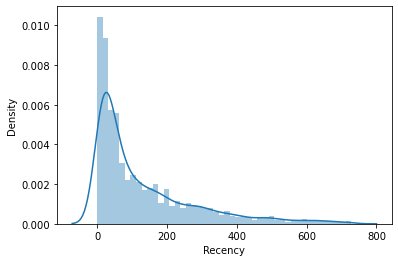

In [194]:
# Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']
ax = sns.distplot(x)

### The above histogram indicates that most of the customers have last visited the store in less than 100 days. However we also see some customers whose last purchase date was more than 6 months ago. These customers are probably churning out. Hence one of the objectives for the business woud be to convert these churning customers into regular customers.

In [195]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    8842.000000
mean       30.504411
std        35.648668
min         1.000000
25%        10.000000
50%        18.000000
75%        35.000000
max       301.000000
Name: Frequency, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


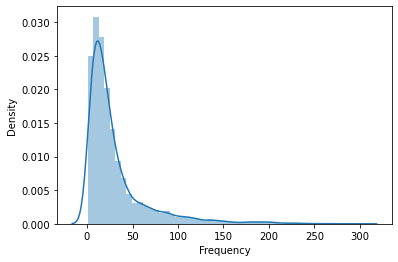

In [196]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores['Frequency']

ax = sns.distplot(x)

#### Again we see a majority of customers who visited the store between 0 - 50 times. Now here, we see some customers whose frequency of visit is more than 50 times. This is a great opportunity for the business, since these customers are extremely loyal customers, since they visit the store more frequently. It is worthwhile for the business to increase customer satisfaction among these customers through strategies like cost effective shipping, better quality, better packaging, bundling products together, etc.

In [197]:

#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count    8842.000000
mean      199.564176
std       241.577220
min         0.570000
25%        57.732500
50%       119.245000
75%       231.152500
max      2235.430000
Name: Monetary, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


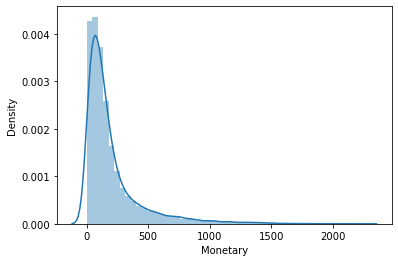

In [198]:

#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

#### The histogram indicates that a majority of customers contribute a monetary value of less than 500, but there are some high value customers with a monetary value of greater than 500. These are most important for the business.

Now that we have identified the recency, frequency and the monetary value of each customer, the next step is to combine these measures to create a composite RFM score. For this purpose, we first divide our customer base into four parts using quantiles.

In [199]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 23.0, 0.5: 65.0, 0.75: 188.0},
 'Frequency': {0.25: 10.0, 0.5: 18.0, 0.75: 35.0},
 'Monetary': {0.25: 57.7325, 0.5: 119.245, 0.75: 231.1525}}

We define two different functions, R Scoring and FnMScoring to classify the customers based on the quantiles discussed above. This is because the most Recent customers with recency of less than 25th pecentile, get a higher rank of 1 while the oldest customers with recency greater than 75th percentile get a lower rank of 4.


Likewise, the more frequent customers get a higher rank of 1 while the least frequent customer, based on the quantile gets a lower rank of 4.

Thus, based on the recency, frequency and monetary value, we have identified 4 separate groups of customers and we have assigned a value between 1 to 4, where 1 = highest rank while 4 = lowest rank. Customers with a score of 1 are the best customers while those with a score of 4 are the worst customers.

In [200]:

#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1


Using the quantiles that we calculated in the above two cells and the function that we created just above, we create a score for each customer in terms of recency, frequency and the monetary values.

In [201]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()


,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
3,257,30,203.17,4,2,2
5,725,1,1.08,4,4,4
6,14,16,147.71,1,3,2
8,33,42,259.14,2,1,1
9,82,13,89.58,3,3,3


We now combine the scores that we calculated above to create a composite score by concatenating the individual R, F and M scores that we calculated above and then adding them up as shown below.

In [202]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
customer_id,,,,,,,,
3,257,30,203.17,4,2,2,422,8
5,725,1,1.08,4,4,4,444,12
6,14,16,147.71,1,3,2,132,6
8,33,42,259.14,2,1,1,211,4
9,82,13,89.58,3,3,3,333,9


#### We now classify our customers into Platinum, Gold, Silver and Bronze customers based on the RFM Score that we calculated above.

In [203]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()


,customer_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,3,257,30,203.17,4,2,2,422,8,Gold
1,5,725,1,1.08,4,4,4,444,12,Bronze
2,6,14,16,147.71,1,3,2,132,6,Gold
3,8,33,42,259.14,2,1,1,211,4,Platinum
4,9,82,13,89.58,3,3,3,333,9,Silver


We now have to validate the scores that we calculated. So we check the values for our Platinum group of customers. We can observe from the below table that Platinum customers generally show lower numbers in terms of Recency and higher numbers in terms of Frequency and Monetary values.

In [204]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,customer_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,5295,16,290,2235.43,1,1,1,111,3,Platinum
1,4727,3,297,2121.31,1,1,1,111,3,Platinum
2,4676,3,301,1995.21,1,1,1,111,3,Platinum
3,8452,16,233,1955.25,1,1,1,111,3,Platinum
4,1720,3,260,1907.90,1,1,1,111,3,Platinum
5,4391,3,257,1776.27,1,1,1,111,3,Platinum
6,1787,4,279,1763.58,1,1,1,111,3,Platinum
7,5174,3,267,1750.14,1,1,1,111,3,Platinum
8,5466,7,224,1716.15,1,1,1,111,3,Platinum
9,4767,3,221,1628.36,1,1,1,111,3,Platinum


   ### Now that we have classified our customers and identified our High value and Low value customers, it is time to do a thorough Exploratory Data Analysis for each of these groups of customers. This will help the business to describe the specific characteristics of High value vs. Low value customers. This analysis would be helpful to devise specific marketing strategies targetin towards each class of customers. A detailed analysis based on RFM classification of customers has been presented in the Tableau Dashboard on the `RFM Analysis` Tab.






# Section 4: K-Means Clustering

In this section we apply a K-Means clustering to divide the customer base into clusters based on similar purchase behavior and demographic characteristics. We then go forward and analyse these clusters in terms of profitability and monetary value for the company.

#### Preprocessing:


A Lot of preprocessing needs to be done, before we apply a K-Means clustering to the dataset.


First, we need to merge our RFM Scores to our final datset using pd.merge based on customer ID.


Next, we need to convert our month variable into month name to get the names of each month, which can then be one hot encoded.


We then identify the relevant categorical variables and apply a one hot encoder to convert them into binary values.



We need to combine/merge these categorical variable dataset to our continuous variable dataset to create a combined dataframe ready for clustering analysis.


Finally, we apply a K-Means clustering algorithm to this pre processed dataset.

#### All the steps indicated above have been executed in the cells below.

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:

# Merge the RFM scores to our original dataset and create the final dataset.

final_dataset = pd.merge(RFMScores,df,on='customer_id')


In [207]:
# Convert month variable in the dataset into Month Name by using the calender.month_abbr function.


import calendar
final_dataset['Monthname'] = final_dataset['the_month'].apply(lambda x: calendar.month_abbr[x])



# Examining the member card variable in the dataset.
final_dataset['member_card'].unique()

array(['Bronze', 'Silver', 'Normal', 'Golden'], dtype=object)

We now create a subset dataframe by separating out the relevant categorical variables which need to be one hot encoded.

In [208]:
clustering_categorical = final_dataset[['state_province','country','yearly_income','gender','education','city','product_name',
                                        'store_city','member_card','occupation','houseowner','brand_name',
                                        'category','family','store_type','store_name','Monthname','the_day'
                                       ]]

We can use ML pipelines to transform all the above listed categorical variables into binary values by using the One Hot Encoder from sklearn.

In [209]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the column transformations list + columns to which to apply
col_transforms = [('transform', OneHotEncoder(), ['state_province','country','yearly_income','gender','education','city','product_name',
                                        'store_city','member_card','occupation','houseowner','brand_name',
                                        'category','family','store_type','store_name','Monthname','the_day'])]

# Create the column transformer
col_trans = ColumnTransformer(col_transforms)

# Fit
col_trans.fit(clustering_categorical)

ColumnTransformer(transformers=[('transform', OneHotEncoder(),
                                 ['state_province', 'country', 'yearly_income',
                                  'gender', 'education', 'city', 'product_name',
                                  'store_city', 'member_card', 'occupation',
                                  'houseowner', 'brand_name', 'category',
                                  'family', 'store_type', 'store_name',
                                  'Monthname', 'the_day'])])

In [210]:
# Apply the transformations
transformed = col_trans.transform(clustering_categorical) 

# Check
transformed
# Put in a DataFrame
transformed_df = pd.DataFrame(data=transformed.todense(), columns=col_trans.get_feature_names())
transformed_df.head()

,transform__x0_BC,transform__x0_CA,transform__x0_DF,transform__x0_Guerrero,transform__x0_Jalisco,transform__x0_Mexico,transform__x0_OR,transform__x0_Sinaloa,transform__x0_Veracruz,transform__x0_WA,...,transform__x16_Nov,transform__x16_Oct,transform__x16_Sep,transform__x17_Friday,transform__x17_Monday,transform__x17_Saturday,transform__x17_Sunday,transform__x17_Thursday,transform__x17_Tuesday,transform__x17_Wednesday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [211]:
# This variable got skipped in the column transformer, so I encoded this variable separately.
# ideally, this variable should have been included in the column transformer, but I wanted to save the effort 
# of running the entire cell again and save time.

final_dataset['houseowner'] =  np.where(final_dataset['houseowner'] == 'Y', 1, 0)

Now I create another subset dataframe called `continuous` which includes all the relevant continuous variables for my clustering dataset. Please note that variables like `coffee_bar`, `florist`, etc have already been assigned binary values in my original dataset, so they dont need to be one hot encoded. Hence I have included them in the continuous variable dataset.

In [212]:
continuous = final_dataset[['unit_sales','total_children','num_cars_owned','houseowner','Recency','Frequency','Monetary',
                                'unit_sales','recyclable_package','low_fat','units_per_case','cases_per_pallet',
                                 'shelf_width', 'shelf_height', 'shelf_depth','store_sqft','grocery_sqft',
                                 'frozen_sqft','meat_sqft','coffee_bar','video_store','salad_bar',
                                 'prepared_food','florist']]

In [213]:
continuous.shape

(269720, 24)

I now create my final dataset for the purpose of clustering and name it `clustering_final_dataset` by concatenating the transformed categorical and the continuous variable datasets as explained above.

In [214]:
clustering_final_dataset = pd.concat([continuous, transformed_df], axis=1)

#### Next, we need to scale our variables to prepare them for clustering.

In [215]:
from sklearn.preprocessing import StandardScaler

# No need for train-test split as we are doing unsupervised learning! (there is only X)

# Instantiate
ss = StandardScaler()

# Fit and transform
X_scaled = ss.fit_transform(clustering_final_dataset)

# Put back in a dataframe
temp = pd.DataFrame(X_scaled, columns=clustering_final_dataset.columns)

### We now apply a kmeans clustering algorithm to our dataset. Ideally we need to determine the optimal number of clusters by looking at inertia and silhouette score. I tried doing that, but the code went running for indefinite time in loops till my kernel died. Also the inertia plot did not give me the exact number of clusters which could be relevant for my analysis. So to keep it less complicated, I predefined the number of clusters to 50 which is feasible given my system configuration and available memory.

In [ ]:
from sklearn.cluster import KMeans
# Instantiate
kmm = KMeans(n_clusters=50)

# Fit
kmm.fit(temp)

# Get labels
km_cluster_labels = kmm.predict(temp)

In [ ]:
# Validating the number of rows returned.

len(km_cluster_labels)

In [ ]:
# Adding the cluster variable to my dataset.

final_dataset['cluster']= km_cluster_labels

In [ ]:
clustering_final_dataset['cluster'] = km_cluster_labels

In [ ]:
# Checking /examining the specific characteristics of my clusters by applying a groupby function based on the clusters.

final_dataset.groupby('cluster').agg(
    {
       
        'RFM_Loyalty_Level': lambda x: x.value_counts().index[0],
        'gender': lambda x: x.value_counts().index[0],
        'city': lambda x: x.value_counts().index[0],
        'state_province': lambda x: x.value_counts().index[0],
        'yearly_income': lambda x: x.value_counts().index[0],
        'education': lambda x: x.value_counts().index[0],
        'occupation': lambda x: x.value_counts().index[0],
        'houseowner': lambda x: x.value_counts().index[0]
        
       
        
    }
).reset_index()

From the above table we can observe that the major differences in our clusters emerges from the geographical location of the customers. Probably a higher number of clusters would have shown more differences.

# I now write this dataset which has the cluster information to my storage bucket, so that I can access this data from Tableau through Google BigQuery. I will use this dataset to provide useful insights from the K-Means clustering output.

In [ ]:
import os

BILLING_PROJECT_ID = 'foodmart-321917'
WORKSPACE = 'capstone'
bucket = 'foodmart_dataset'
from google.cloud import storage
import pandas as pd

bucket_name = bucket # Calling the bucket name where data needs to be stored.

storage_client = storage.Client()
bucket = storage_client.get_bucket(bucket_name)

for b in bucket.list_blobs(): # viewing all the existing files in my storage bucket.
    print(b)

In [ ]:
# Writing the output file back to my storage bucket.

bucket.blob('output_with_clusters.csv').upload_from_string(final_dataset.to_csv(), 'text/csv')

# Section 5: RFM Modeling

## First we need to divide our profit margins into three classes - High profit margins, Medium and Low profit margins.

In [ ]:
# Setting a cut off score to divide our profit margins to three classes.
# The cut off score is based on 33th percentile and 67th percentile. 

final_dataset['profit_margin'] = (final_dataset['store_sales']/final_dataset['store_cost'])/final_dataset['store_sales']
high = np.percentile(np.array(final_dataset['profit_margin']),67)
high

In [ ]:
low = np.percentile(np.array(final_dataset['profit_margin']),33)
low

In [ ]:
# We use the above calculated percentile value of profit margins to set our profit_level variable.

final_dataset['profit_level'] =[0 if x < low
                                else (1 if x < high
                                     else 2)for x in final_dataset.profit_margin]
                                         

In [ ]:
final_dataset['profit_level'].unique()

# Predicting customer loyalty

### We now use Random Forest Classifier to predict customer loyalty i.e. predict our Platinum, Gold, siver and Bronze customers.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

We first set our X and Y variables for the model. We remove the `Recency`, `Frequency` and `Monetary` columns from our earlier X dataframe to create the new set of X variables for predicting RFM_loyalty.

In [ ]:
final_dataset['RFM_Loyalty_Level'].unique() # This is our Y variable, but first we have to do one hot encoding to use it.

### We now convert our `RFM_Loyalty_Level` into numeric values since this is our Y variable now.

In [ ]:
final_dataset['RFM_category_no'] =[0 if x == 'Bronze'
                                else (1 if x == 'Silver'
                                      else (2 if x == 'Gold'
                                     else 3))for x in final_dataset.RFM_Loyalty_Level]

In [ ]:
final_dataset['RFM_category_no'].unique() # checking the values of the new variable created.

In [ ]:
final_dataset.columns

In [ ]:
y = final_dataset['RFM_category_no'] # Finalizing our Y-variable for prediction.

In [ ]:
X = final_dataset[['city','state_province','yearly_income','gender','num_children_at_home','education','member_card',
             'occupation','houseowner','num_cars_owned','brand_name','product_name','recyclable_package', 
             'low_fat', 'units_per_case', 'cases_per_pallet','category','store_type','store_name',
             'store_sqft','grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store','salad_bar', 
             'prepared_food', 'florist','the_day','Monthname']]
             

# Our X dataframe above has a lot of categorical variables, so we need to first transform them into binary variables.So we apply a column transformer to apply One Hot Encoding to these categorical variables.

In [ ]:
# Identify the categorical explanatory variables.

categorical =X[['city','state_province','yearly_income','gender','education','member_card',
             'occupation','brand_name','category','store_type','store_name','the_day',
                'Monthname']]

In [ ]:
#  identify the continous explanatory variables.

continuous = X[['num_children_at_home','houseowner','num_cars_owned','recyclable_package', 
             'low_fat', 'units_per_case', 'cases_per_pallet','store_sqft','grocery_sqft', 
            'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store','salad_bar', 
             'prepared_food', 'florist']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the column transformations list + columns to which to apply
col_transforms = [('transform', OneHotEncoder(), ['city','state_province','yearly_income','gender','education','member_card',
             'occupation','brand_name','category','store_type','store_name','the_day',
                'Monthname'])]

# Create the column transformer
col_trans = ColumnTransformer(col_transforms)

# Fit
col_trans.fit(categorical)

In [ ]:
# Apply the transformations
transformed2 = col_trans.transform(categorical) 

# Check
transformed2
# Put in a DataFrame
transformed_df2 = pd.DataFrame(data=transformed2.todense(), columns=col_trans.get_feature_names())
transformed_df2.head()

In [ ]:
continuous.shape

In [ ]:
transformed_df2.shape

In [ ]:
# Now that we have transformed our categorical  variables, we merge it with out continuous variable dataset.
# this new dataset is our explanatory variable set for predicting profit levels.
# We call this new variable set X1.

X1 = pd.concat([continuous, transformed_df2], axis =1)

In [ ]:
X1.columns

#### Now that we have our X and Y variables, we will split our data into train and test.

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

### Now we run our feature selection technique to remove variables which donot add value to the model. For this purpose, we use the Recurrent Feature Elimination technique with cross validation from the sklearn package.The Recursive Feature Elimination technique applies a recursive approach to selectively prune the features which donot add value to the model(in terms of coefficients). The `CV` parameter performs Recursive Feature Elimination in a cross validation loop to return the most optimal number of features.

In [ ]:
# Instantiate the RFECV procedure.

from sklearn.feature_selection import RFECV


# Init, fit
rfecv = RFECV(
    estimator=RandomForestClassifier(max_depth=5, n_estimators=20),
    min_features_to_select=10,
    step=50,
    n_jobs=-1,
    cv=5,
)

### We need to scale our variables before running the RFECV algorithm, so we use the standard scaler.

In [ ]:

scaler = StandardScaler()
scaler.fit(X_train1)
X_scaled_train1 = scaler.transform(X_train1)
X_scaled_test1 = scaler.transform(X_test1)

In [ ]:
# Fitting the RFECV algorithm to identify the most significant features for our Random Forest Classifier.

rfecv.fit(X_scaled_train1,y_train1)

We now get the list of variables which our feature selection algorithm has returned.

In [ ]:
X_new1 = X_train1.columns[rfecv.support_]
X_new1

Using the loc function, we extract the columns indicated by the RFECV algorithm from our initial X_train1 and X_test1 datsaets to create our new training and testing explanatory variables, ready to be applied to Random Forest classifier.

In [ ]:
X_train_new1 = X_train1.loc[:, rfecv.support_]
X_test_new1 = X_test1.loc[:, rfecv.support_]

#### We now apply a grid search technique to identify the best hyperparameters from RandomForest Classifier which would return the highest accuracy for Cross validation and test dataset without overfitting the model.

In [ ]:
## create placeholders

estimators = [('scaler',StandardScaler()),('model',RandomForestClassifier())]

# pipeline itself

mypipe = Pipeline(estimators)

# parameter grid

param_grid = [{'model':[RandomForestClassifier()],
             'model__max_depth':[1,2,3,4,5],
            'model__n_estimators' : [10,20,30,35,40,41,42,43,44,45,50]}]
             

# grid itself

grid = GridSearchCV(mypipe,param_grid,cv = 5)

# fit grid

fitted_grid1 = grid.fit(X_train_new1,y_train1)

In [ ]:
fitted_grid1.best_params_

In [ ]:
# Checking the cross validation score

fitted_grid1.best_score_

In [ ]:
# Checking the test score

fitted_grid1.score(X_test_new1, y_test1)

###  Conclusion: Both the cross validation and the test dataset have returned an accuracy of approximately 78% which indicates there is no overfitting.

#### We now use this model to predict our RFM Loyalty levels.

In [ ]:
# Predicting the loyal levels for training and testing dataset.
predicted_train = fitted_grid1.predict(X_train_new1)
predicted_test = fitted_grid1.predict(X_test_new1)

# What we got above is a numpy array. We need to convert this array into a dataframe to merge it with out final dataset.
predicted_train = pd.DataFrame(predicted_train, columns = ['Predicted_RFM'])


predicted_test = pd.DataFrame(predicted_test, columns = ['Predicted_RFM'])


We now merge both the above predicted datasets into one dataframe which contains all the predicted values, stacked one above the other.



In [ ]:
# concatenating both the predicted datasets, row wise.
Predicted_loyalty = pd.concat([predicted_train, predicted_test], axis=0)

In [ ]:
# We finally merge the predicted_loyalty dataset to our main final_dataset, which can be loaded onto Tableau through 
#google cloud storage.

final_dataset = pd.concat([final_dataset.reset_index(), Predicted_loyalty.reset_index()], axis=1)

# Applying XGBoost Classifier to predict customer loyalty

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train_new1, y_train1)
print(f"XG Boost score: {XGB_model.score(X_test_new1, y_test1)}")

### As we can observe, XGBoost Classifier also returned a test accuracy of 78% which is similar to Random Forest Classifer. However the advantage of XGBoost Classifier is that it is faster and occupies less memory space as compared to Random Forest Classifier.

We now look at the most important features which would help in predicting customer loyalty levels i.e. Platinum, Gold, Silver and Bronze.

In [ ]:
# Getting feature importances from the XGBoost model

print(XGB_model.feature_importances_)

In [ ]:

# plot the feature importances.

plt.bar(range(len(XGB_model.feature_importances_)), XGB_model.feature_importances_)
plt.show()


##### As the bar graph indicates Features 1, 6, 7 and 9 are the highest contributors to the model. If we look at these feature numbers in our training dataset, we can identify the most important features as: Grocery sq. ft, British Columbia, California, Store no. 24. This means that small grocery stores, stores located in BC and California and Store 24 are the highest contributors in the model to predict customer loyalty levels.

# Section 6: Modeling Store Profit Margin level

In [ ]:
# Identifying our Y variable

y3 = final_dataset['profit_level']

In [ ]:
final_dataset.columns

In [ ]:
# Identifying the relevant set of explanatory variables from our main dataset.

X2 = final_dataset[['brand_name','SKU','SRP','gross_weight','net_weight','recyclable_package',
                  'low_fat','units_per_case','cases_per_pallet','shelf_width','shelf_height','shelf_depth',
                  'store_type','store_name','store_city','store_state','store_manager','store_sqft','grocery_sqft',
                  'frozen_sqft','meat_sqft','coffee_bar','video_store','salad_bar','prepared_food','florist',
                  'sales_city','sales_state_province','the_day','Monthname','category']]

In [ ]:
# Separating the categorical variables which need to be one hot encoded from our explanatory variable dataset identified above.

categorical = X2[['brand_name','store_type','store_name','store_city','store_state','store_manager',
                'sales_city','sales_state_province','the_day','Monthname','category']]

We now apply OneHot Encoding to our categorical variables listed in the categorical dataframe created in the above cells.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create the column transformations list + columns to which to apply
col_transforms = [('transform', OneHotEncoder(), ['brand_name','store_type','store_name','store_city',
                                                  'store_state','store_manager','sales_city','sales_state_province',
                                                  'the_day','Monthname','category'])]

# Create the column transformer
col_trans = ColumnTransformer(col_transforms)

# Fit
col_trans.fit(categorical)

In [ ]:
# Apply the transformations
transformed2 = col_trans.transform(categorical) 

# Check
transformed2
# Put in a DataFrame
transformed_df2 = pd.DataFrame(data=transformed2.todense(), columns=col_trans.get_feature_names())
transformed_df2.head()

In addition to the categorical variables, we also need to identify the continuous variables required for our model build. We store all our continuous variables in our dataframe `continuous1` as shown below:

In [ ]:
continuous1 = X2[['SKU','SRP','gross_weight','net_weight','recyclable_package',
                  'low_fat','units_per_case','cases_per_pallet','shelf_width','shelf_height','shelf_depth',
                  'store_sqft','grocery_sqft',
                  'frozen_sqft','meat_sqft','coffee_bar','video_store','salad_bar','prepared_food','florist']]

In [ ]:
# We create our final set of explanatory variable dataset by concatenating the categorical (one Hot encoded) and continuous variable datasets.

X3 = pd.concat([continuous1, transformed_df2], axis =1)

In [ ]:
X3.columns

In [ ]:
# Creating our training and testing datasets.

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3,
                                                    y3,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

As earlier, we will be testing two ML techniques for our purpose: Random Forest Classifier and XGBoost Classifier.


We first perform a feature selection procedure using the RFECV algorithm as discussed earlier to identify the most significant variables which add value to the model.

In [ ]:
# Instantiate the RFECV procedure.

from sklearn.feature_selection import RFECV


# Init, fit
rfecv = RFECV(
    estimator=RandomForestClassifier(max_depth=5, n_estimators=20),
    min_features_to_select=5,
    step=50,
    n_jobs=-1,
    cv=5,
)

In [ ]:
# The RFECV algorithm first needs to scale the variables.

scaler = StandardScaler()
scaler.fit(X_train2)
X_scaled_train2 = scaler.transform(X_train2)
X_scaled_test2 = scaler.transform(X_test2)

In [ ]:
# We fit the RFECV model to our training dataset to get the most significant features.

rfecv.fit(X_scaled_train2,y_train2)

In [ ]:

# Getting the new set of explanatory variables after applying feature selection.

X_new2 = X_train2.columns[rfecv.support_]
X_new2

In [ ]:
# extracting the new variables from our original X_train2 dataset, ready to go into the model.

X_train_new2 = X_train2.loc[:, rfecv.support_]
X_test_new2 = X_test2.loc[:, rfecv.support_]

In [ ]:
## create placeholders

estimators = [('scaler',StandardScaler()),('model',RandomForestClassifier())]

# pipeline itself

mypipe = Pipeline(estimators)

# parameter grid

param_grid = [{'model':[RandomForestClassifier()],
             'model__max_depth':[1,2,3,4,5],
            'model__n_estimators' : [10,20,30,35,40,41,42,43,44,45,50]}]
             

# grid itself

grid = GridSearchCV(mypipe,param_grid,cv = 5)

# fit grid

fitted_grid2 = grid.fit(X_train_new2,y_train2)

In [ ]:
# Identifying the best parameters for the model.

fitted_grid2.best_params_

In [ ]:
# The cross validation score from the best model.

fitted_grid2.best_score_

In [ ]:
# The test score

fitted_grid2.score(X_test_new2, y_test2)

### Conclusion: Both the test score and the cross validation score is 69% indicating no overfitting.

### We now use our model to predict profit levels. For this, we use the predict function to predict the profit margin levels for training and testing data. We then try to merge these predicted values into our main dataset. By doing so, we can compare the actual values with the predicted values and visualize the accuracy of the model through Tableau.

In [ ]:
# Predicting the profit margin levels for training and testing dataset.
predicted_train1 = fitted_grid2.predict(X_train_new2)
predicted_test1 = fitted_grid2.predict(X_test_new2)

# What we got above is a numpy array. We need to convert this array into a dataframe to merge it with out final dataset.
predicted_train1 = pd.DataFrame(predicted_train1, columns = ['Predicted_margin'])


predicted_test1 = pd.DataFrame(predicted_test1, columns = ['Predicted_margin'])

In [ ]:
# concatenating both the predicted datasets, row wise.
Predicted_margin = pd.concat([predicted_train1, predicted_test1], axis=0)

In [ ]:
# We finally merge the predicted_margin dataset to our main final_dataset, which can be loaded onto Tableau through 
#google cloud storage.

final_dataset = pd.concat([final_dataset.reset_index(), Predicted_margin.reset_index()], axis=1)

## Our final dataset containing all the model outputs is now ready to be written back to Google cloud storage, which connects to Tableau via Google Big Query.

In [ ]:

# Writing the output file back to cloud storage.

bucket.blob('output_with_clusters.csv').upload_from_string(final_dataset.to_csv(), 'text/csv')

### Calculating feature importances from the Random Forest Classifier

We first fit the final model obtained from the grid search.

We can also calculate the time taken to estimate feature importances.

Both these steps are detailed out below:

In [ ]:
# Fitting the final model with the best parameters obtained from the grid search.

forest = RandomForestClassifier(max_depth=5, n_estimators=45)
forest.fit(X_train_new2, y_train2)

In [ ]:
# Calculate feature importances and time to compute feature importances using the time function.

import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

In [ ]:
# Putting our feature importances into a dataframe for plotting.

feature_names = [f'feature {i}' for i in range(X_train_new2.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)


# Plotting the feature importances.

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

From the bar graph, we may conclude that small grocery stores and SRP (shelf ready packaging) are the highest contributing features to our model.

In [ ]:
X_train_new2.columns

In [ ]:
print(forest.feature_importances_)

In [ ]:
%pip install xgboost

# Applying XGBoost Classifier to predict profit margins.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Instantiate the model

XGB_model = XGBClassifier()

# Fit the model

XGB_model.fit(X_train_new2, y_train2)
print(f"XG Boost score: {XGB_model.score(X_test_new2, y_test2)}")

We may notice here that again, both XGBoost and Random Forest Classifiers generated similar accuracies at around 69%.

In [ ]:
# Getting the feature importances from the XGBoost model

print(XGB_model.feature_importances_)

In [ ]:

# ploting the feature importances.

plt.bar(range(len(XGB_model.feature_importances_)), XGB_model.feature_importances_)
plt.show()


As we can observe, again SRP and small grocery stores emerged as the highest contributing features with maximum feature importances.

# Next steps:

This analysis mainly included exploratory data analysis and modeling customer loyalty and profit margins. Furthermore, we can also explore different specific products and build recommender systems based on the product names. Also, we can deploy the model and host it as a web application. 